In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

- Exercici 1

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.També adjunt trobaràs una descripció de les diferents variables del dataset.

In [40]:
data=pd.read_csv('housing data.csv', header=None)
data

0     1      2   3      4      5     6       7   8      9     10  \
0    0.00632  18.0   2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1    0.02731   0.0   7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2    0.02729   0.0   7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3    0.03237   0.0   2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4    0.06905   0.0   2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   
..       ...   ...    ...  ..    ...    ...   ...     ...  ..    ...   ...   
501  0.06263   0.0  11.93   0  0.573  6.593  69.1  2.4786   1  273.0  21.0   
502  0.04527   0.0  11.93   0  0.573  6.120  76.7  2.2875   1  273.0  21.0   
503  0.06076   0.0  11.93   0  0.573  6.976  91.0  2.1675   1  273.0  21.0   
504  0.10959   0.0  11.93   0  0.573  6.794  89.3  2.3889   1  273.0  21.0   
505  0.04741   0.0  11.93   0  0.573  6.030  80.8  2.5050   1  273.0  21.0   

         11    12    13  
0    396.90  4.98  24.0  
1    396.90  9.14  21.6  
2    392.83  4.03  34.7  
3    394.63  2.94  33.4  
4    396.90  5.33  36.2  
..      ...   ...   ...  
501  391.99  9.67  22.4  
502  396.90  9.08  20.6  
503  396.90  5.64  23.9  
504  393.45  6.48  22.0  
505  396.90  7.88  11.9  

[506 rows x 14 columns]

Attribute Information en "housing data description.txt":

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [41]:
data.columns = ["CRIM","ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B_1000", "LSTAT", "MEDV"]
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO  B_1000  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [42]:
data.isna().any().any() #no hay valores nulos

False

In [43]:
from sklearn.model_selection import train_test_split

X = data.drop(['CRIM'],axis=1)
y = data['CRIM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=15) 

# X_train representa un 80% del original y X_test el 20%
# random_state: para reproducir la misma aleatoriedad al separar el dataset

In [44]:
y_train.size # 404 filas para el train

404

In [45]:
y_test.size #102 filas para el test

102

In [46]:
len(X_train), len(X_test)

(404, 102)

In [47]:
print(X_test.dtypes) # mismas columnas y tipo de columna también será para X_train

ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B_1000     float64
LSTAT      float64
MEDV       float64
dtype: object


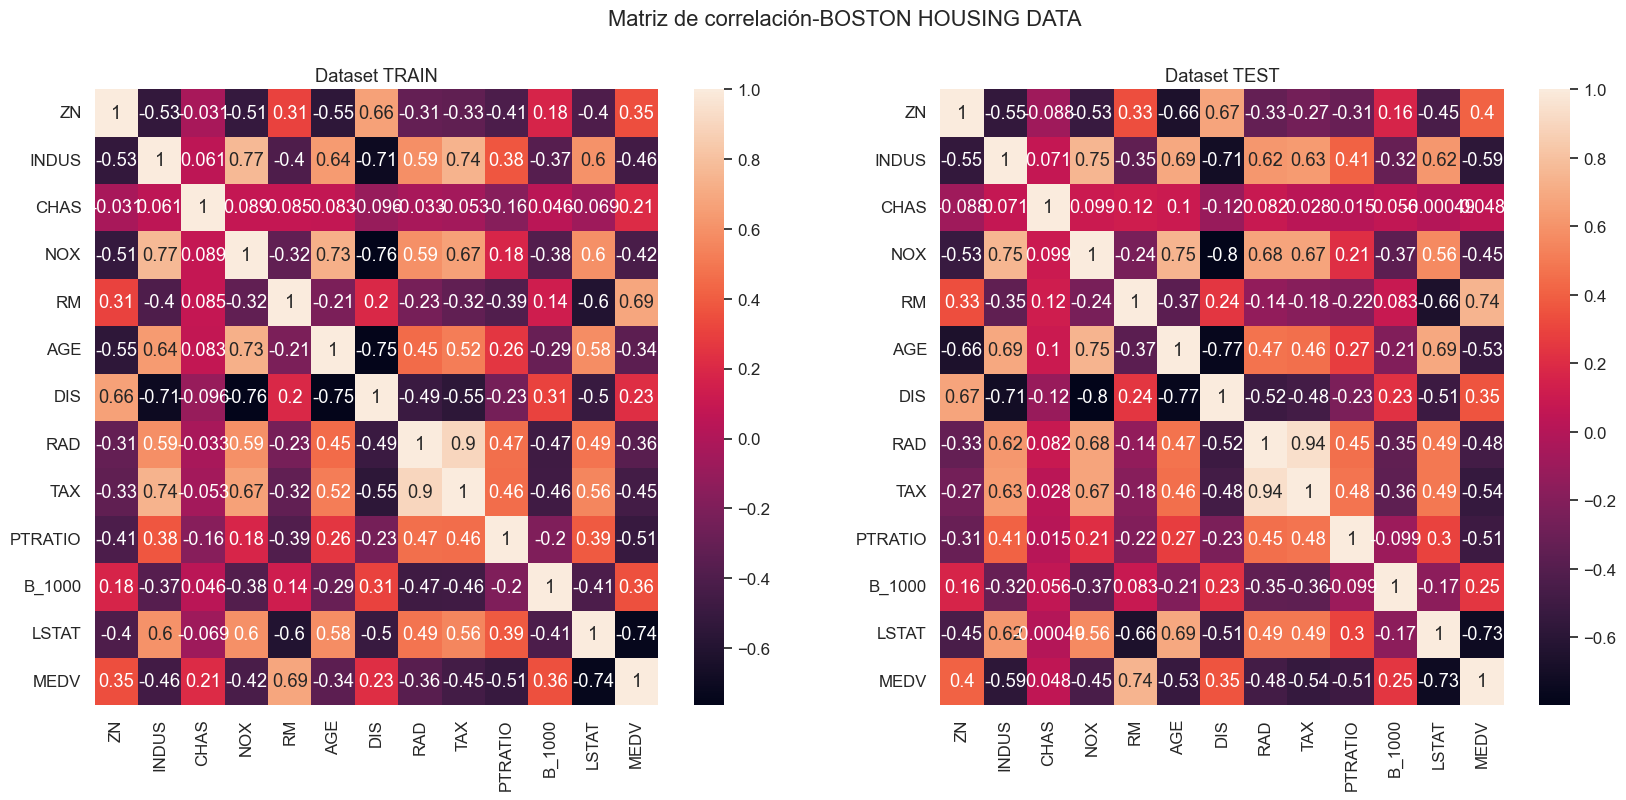

In [57]:
corr_train=X_train.corr()
corr_test=X_test.corr()

fig,axs =plt.subplots(1,2, figsize=(20,8))
sns.set(font_scale=1.1)
fig.suptitle('Matriz de correlación-BOSTON HOUSING DATA')

g1=sns.heatmap(corr_train, annot=True, ax=axs[0])
g2=sns.heatmap(corr_test, annot=True, ax=axs[1])

g1.set(title='Dataset TRAIN')
g2.set(title='Dataset TEST')

plt.show()

In [62]:
print(X_train.describe(),"\n\n\n")
print(X_test.describe())

               ZN       INDUS        CHAS         NOX          RM         AGE  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    11.181931   11.157772    0.066832    0.554967    6.287017   68.070545   
std     23.258867    6.846278    0.250040    0.116076    0.701452   28.554932   
min      0.000000    0.460000    0.000000    0.385000    3.561000    2.900000   
25%      0.000000    5.190000    0.000000    0.452000    5.895750   42.325000   
50%      0.000000    9.690000    0.000000    0.538000    6.229000   76.700000   
75%     12.500000   18.100000    0.000000    0.624000    6.626000   94.025000   
max    100.000000   27.740000    1.000000    0.871000    8.725000  100.000000   

              DIS         RAD         TAX     PTRATIO      B_1000       LSTAT  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.742042    9.539604  408.445545   18.434406  353.699604   12.571337   
std      2.034927    8.6392

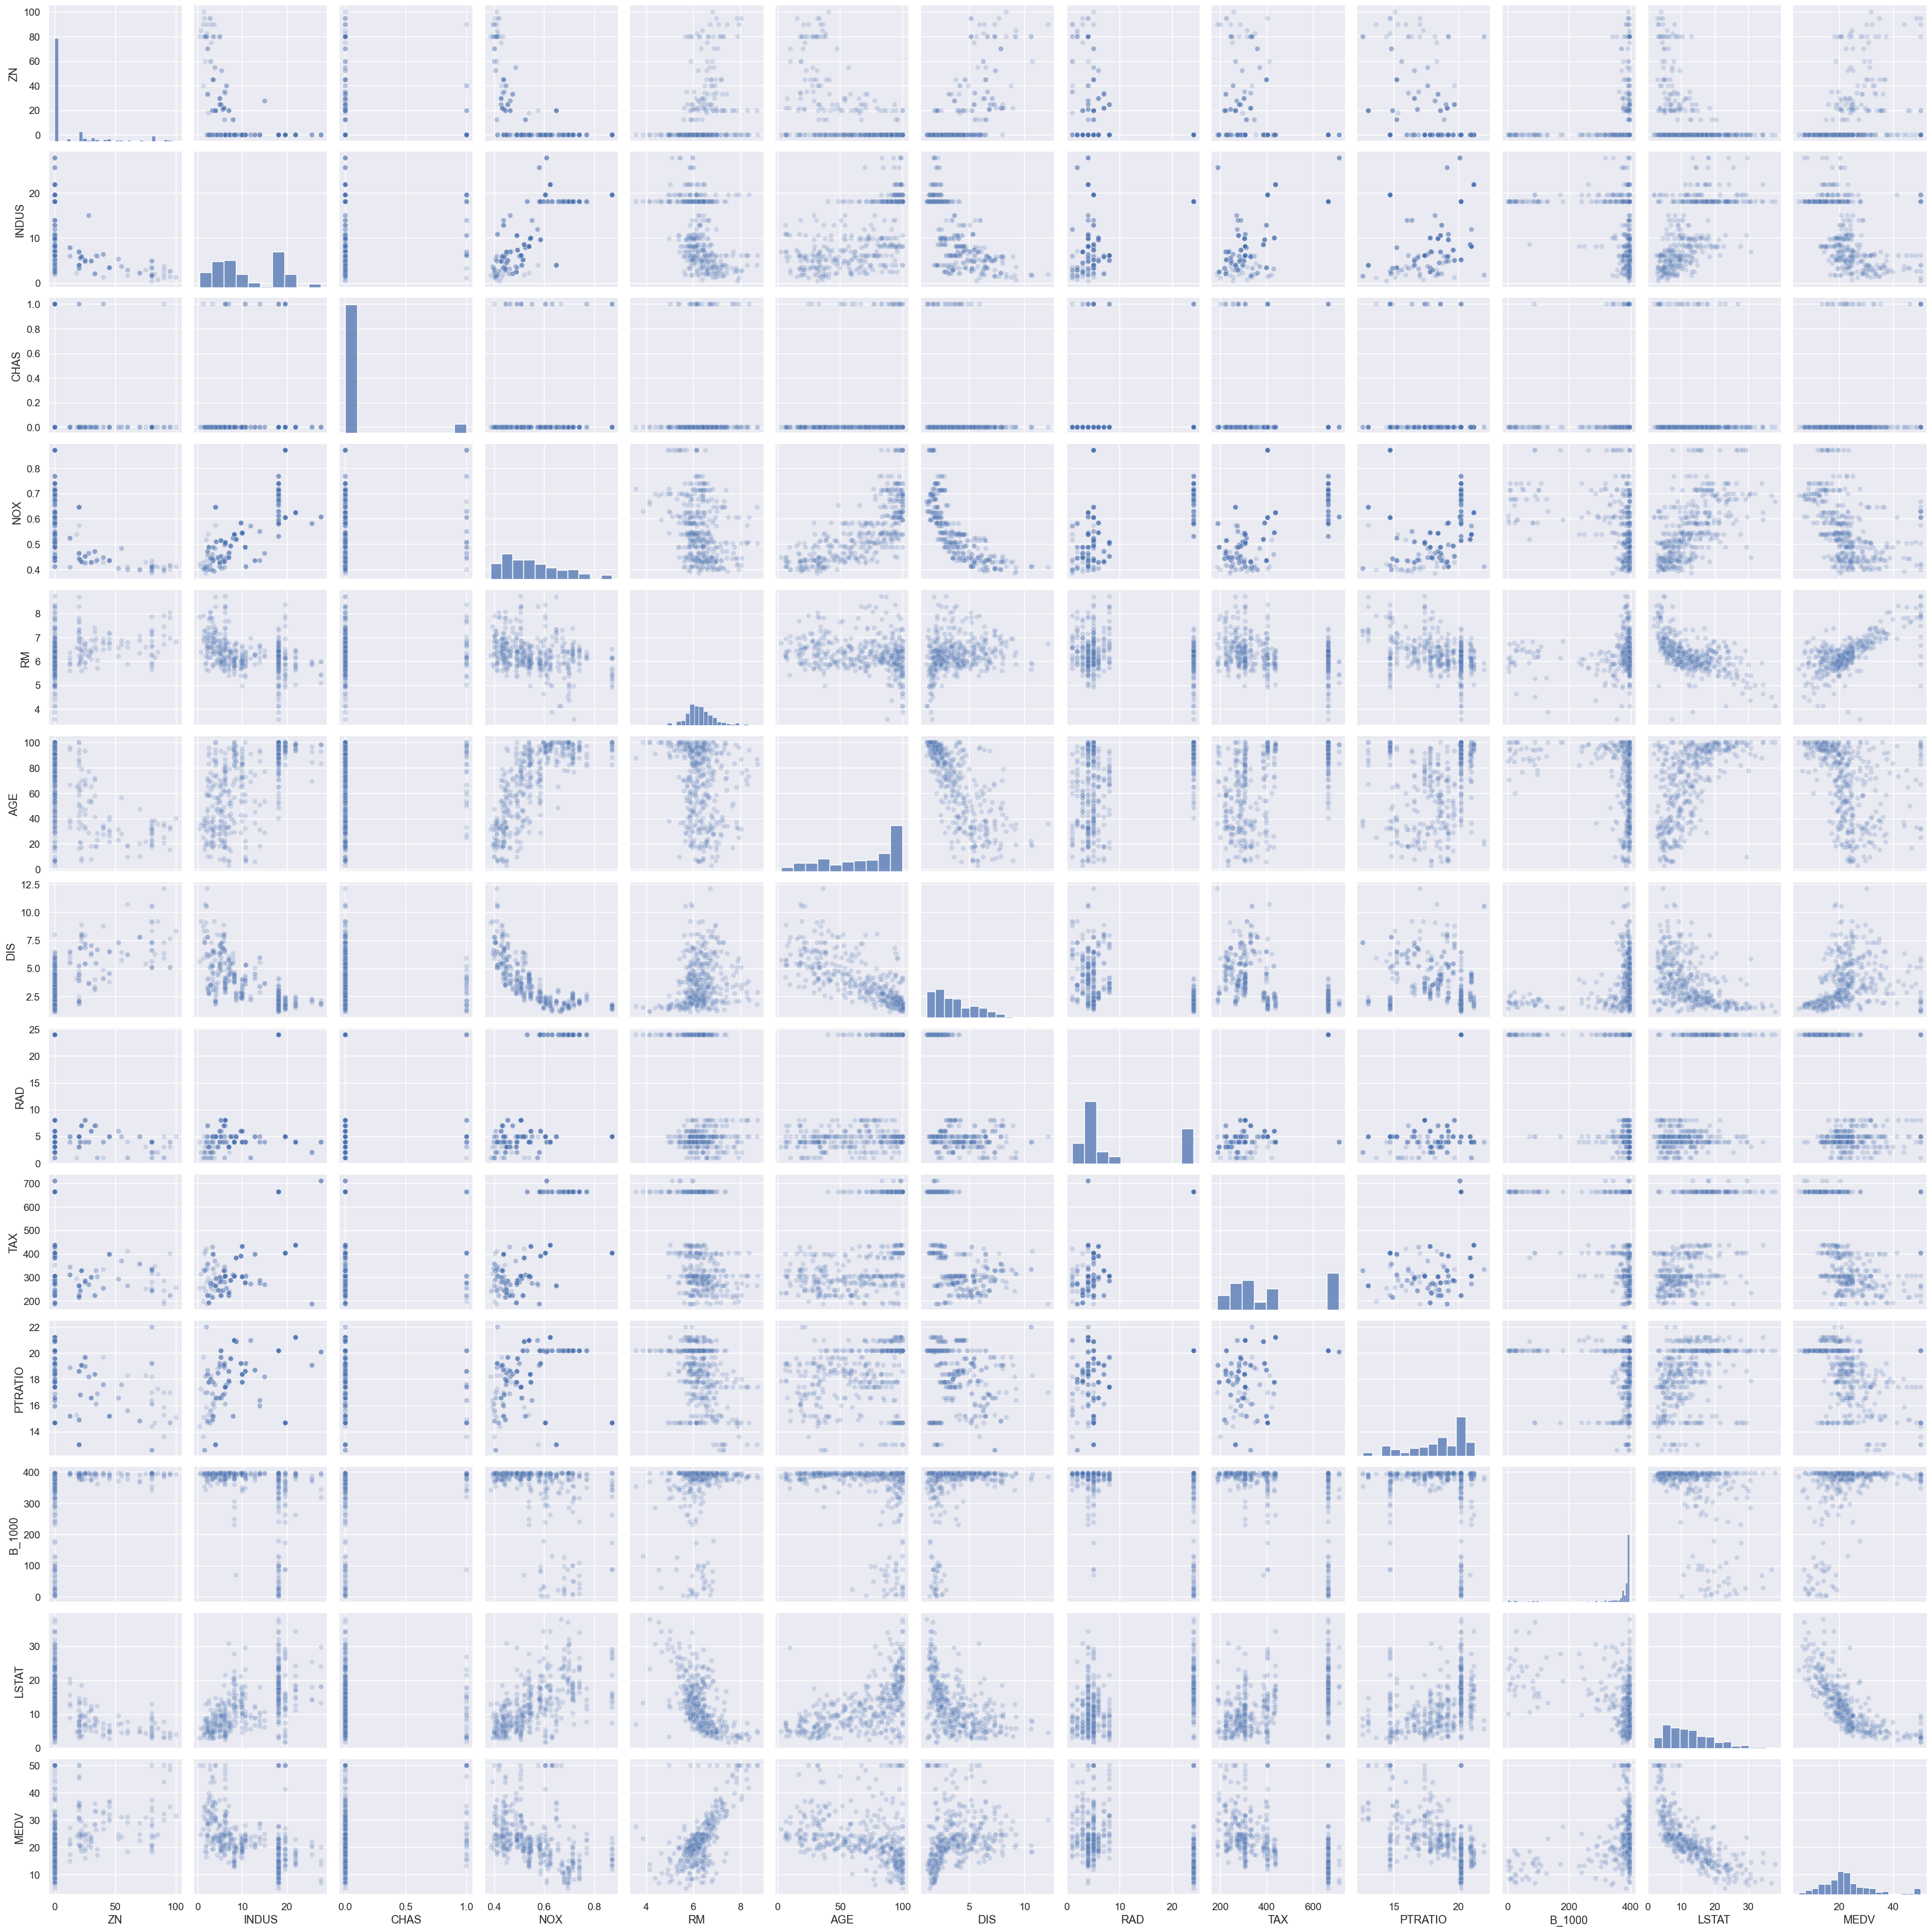

In [63]:
sns.pairplot(X_train, diag_kind='hist', plot_kws={'alpha': 0.2})

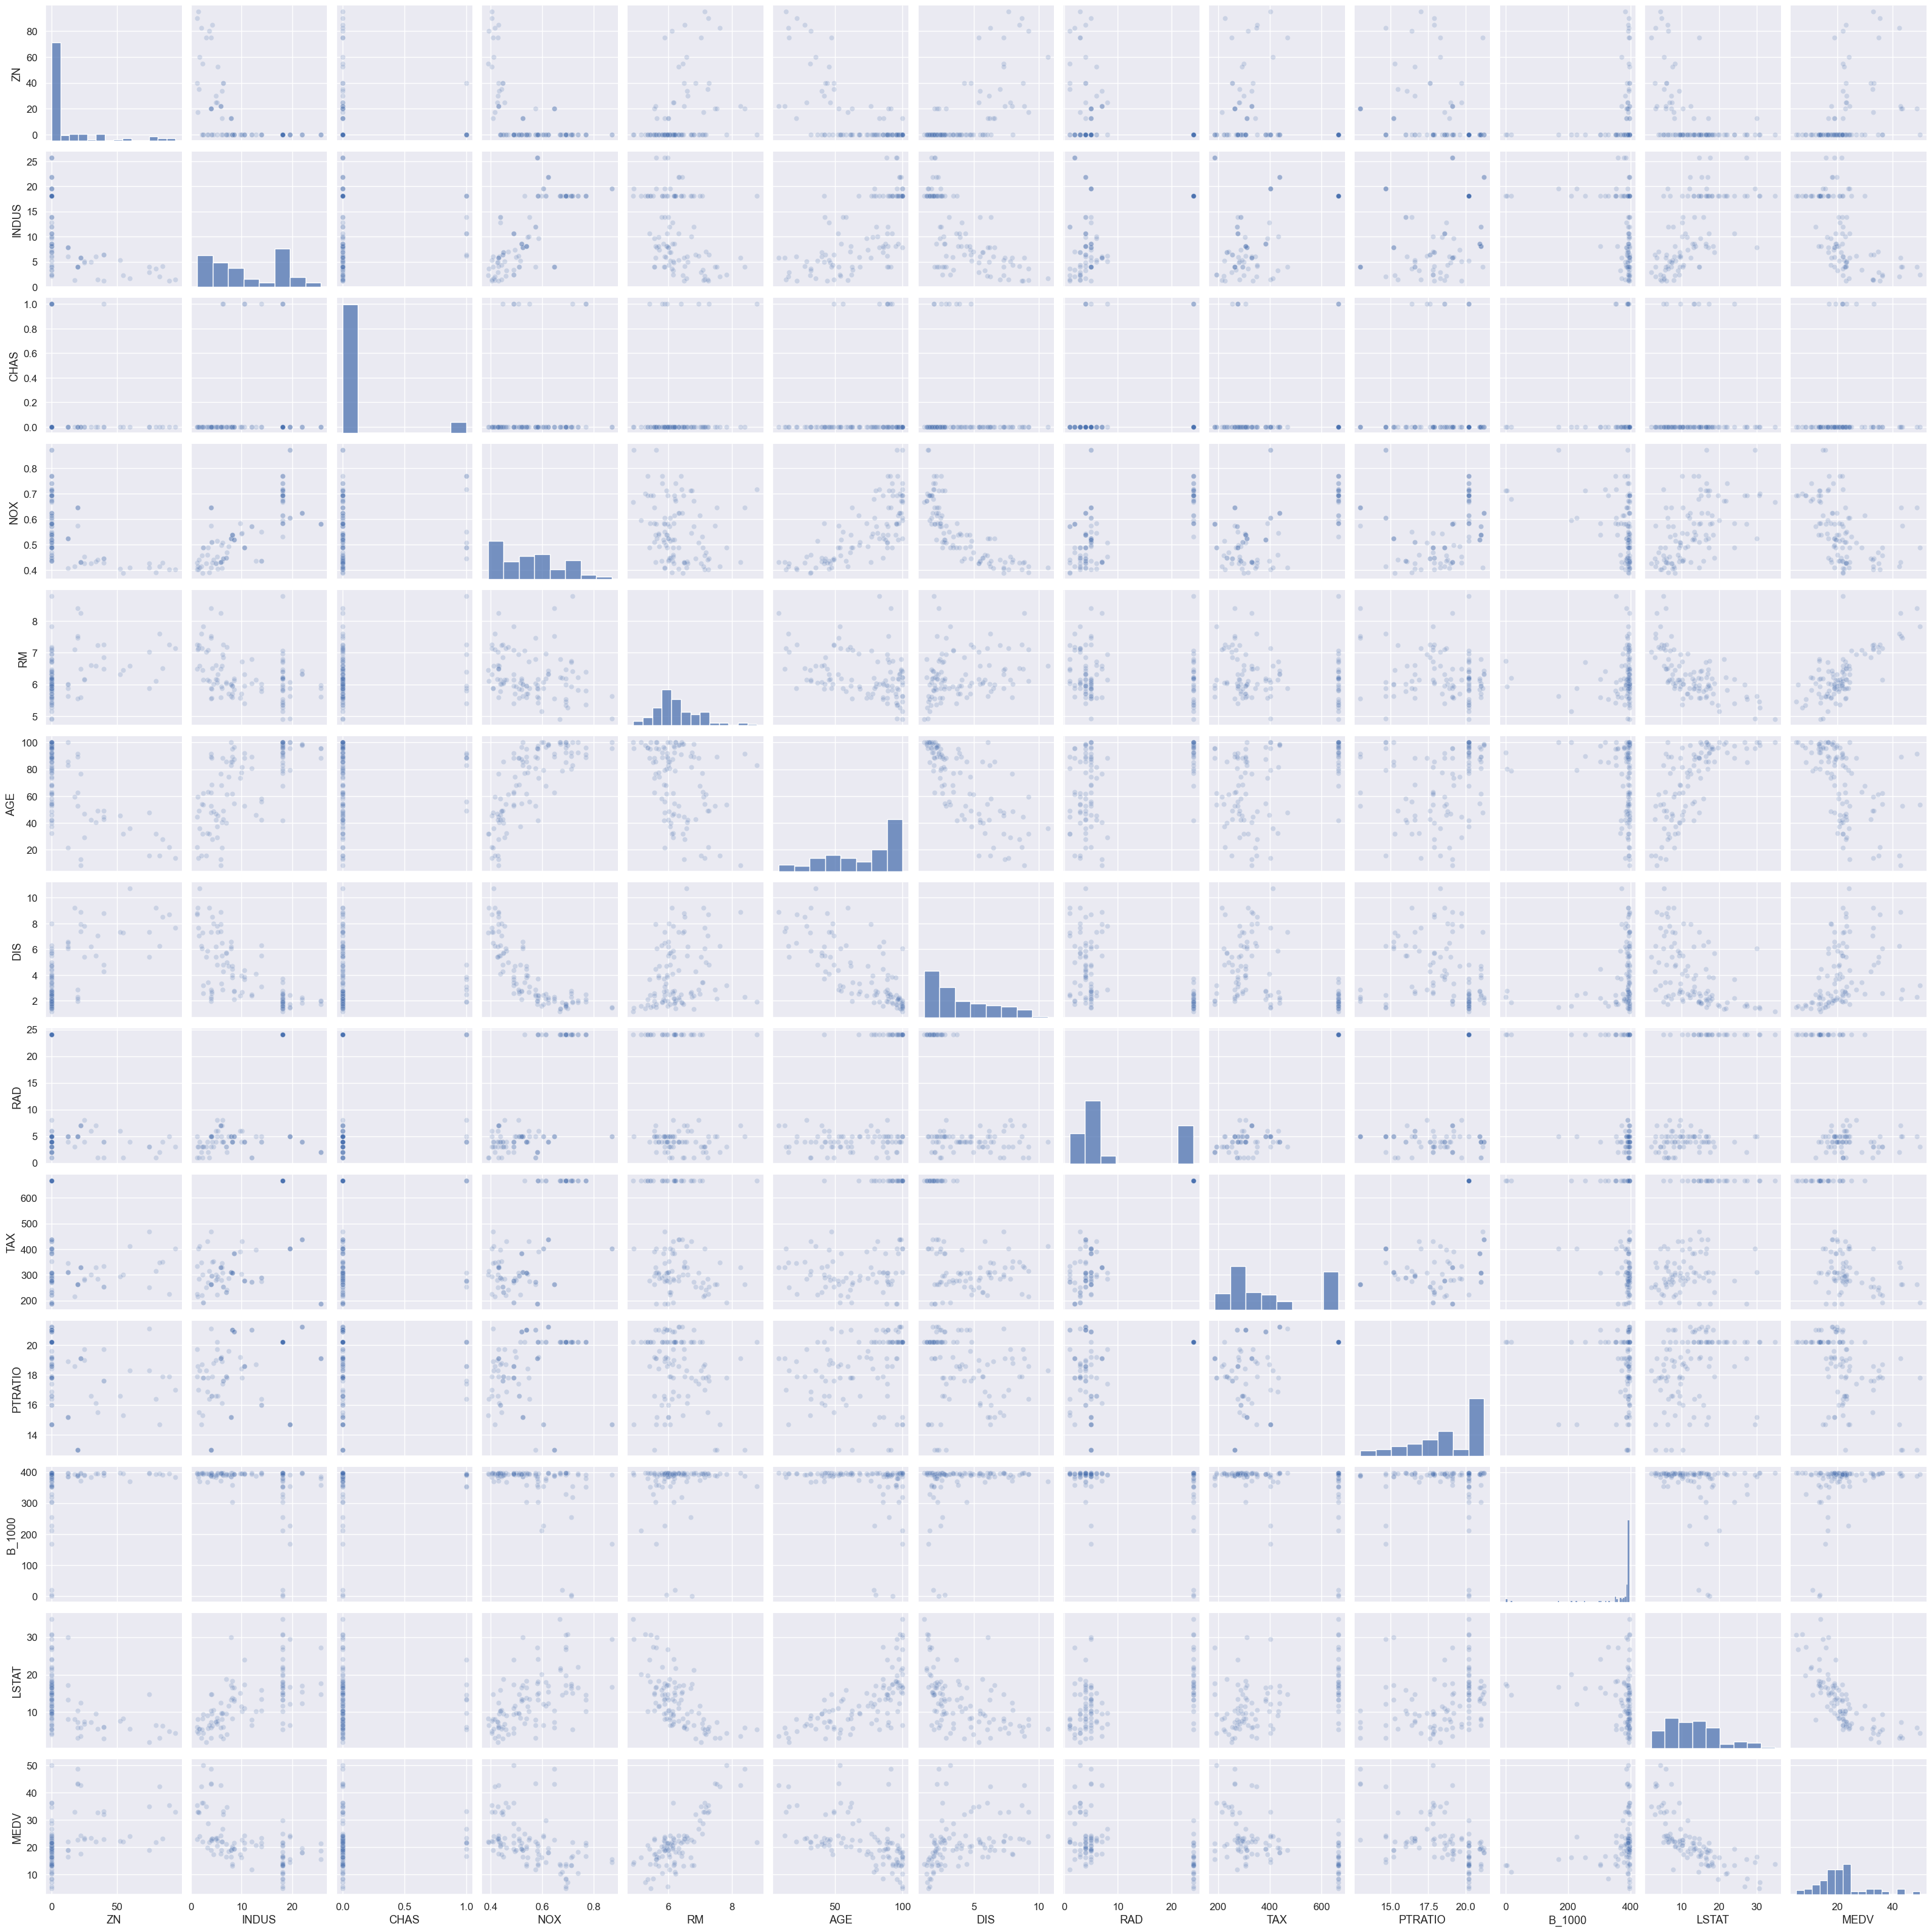

In [64]:
sns.pairplot(X_test, diag_kind='hist', plot_kws={'alpha': 0.2})

- Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

<AxesSubplot: >

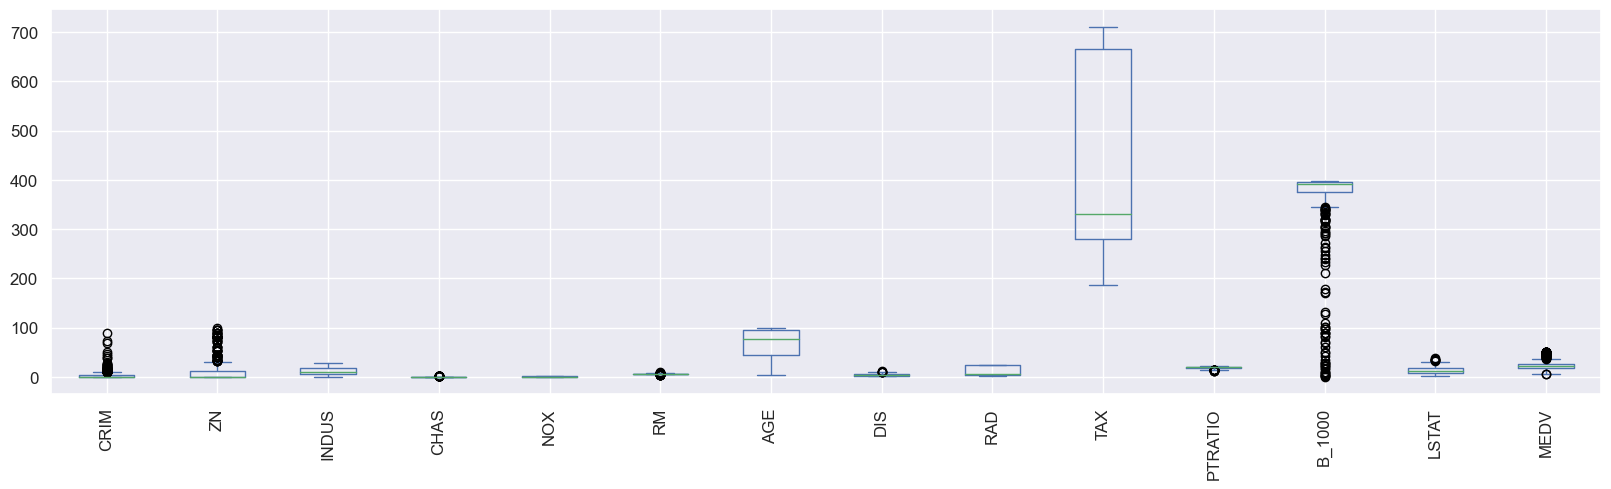

In [65]:
data.plot.box(figsize=(20,5), rot=90)

In [67]:
from sklearn.preprocessing import MinMaxScaler

columnsNorm = ["CRIM","ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B_1000", "LSTAT", "MEDV"]
scaler = MinMaxScaler().fit(data[columnsNorm])
data[columnsNorm] = scaler.transform(data[columnsNorm])

data.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO    B_1000     LSTAT      MEDV  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000  
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111  
4  0.086957  0.066794  0.648936  1.000000  0.099338  0.693333

- Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

<AxesSubplot: >

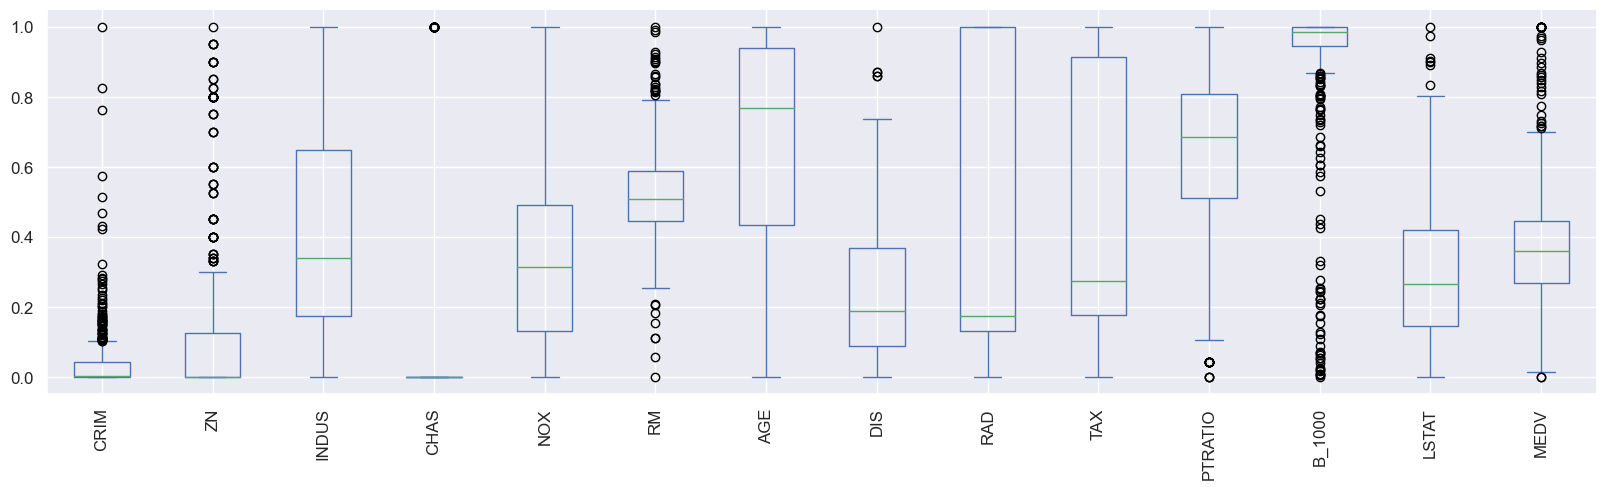

In [75]:
data.plot.box(figsize=(20,5), rot=90) #después de normalizar todas las features, todas tienen la misma escala entre 0 y 1

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B_1000   506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [72]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.040544    0.113636    0.391378    0.069170    0.349167    0.521869   
std      0.096679    0.233225    0.251479    0.253994    0.238431    0.134627   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000851    0.000000    0.173387    0.000000    0.131687    0.445392   
50%      0.002812    0.000000    0.338343    0.000000    0.314815    0.507281   
75%      0.041258    0.125000    0.646628    0.000000    0.491770    0.586798   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              AGE         DIS         RAD         TAX     PTRATIO      B_1000  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     0.676364    0.242381    0.371713    0.422208    0.622929    0.898568   
std      0.289896    0.191482    0.378576    0.321636    0.230313    0.230205   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.433831    0.088259    0.130435    0.175573    0.510638    0.945730   
50%      0.768280    0.188949    0.173913    0.272901    0.686170    0.986232   
75%      0.938980    0.369088    1.000000    0.914122    0.808511    0.998298   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean     0.301409    0.389618  
std      0.197049    0.204380  
min      0.000000    0.000000  
25%      0.144040    0.267222  
50%      0.265728    0.360000  
75%      0.420116    0.444444  
max      1.000000    1.000000

<AxesSubplot: >

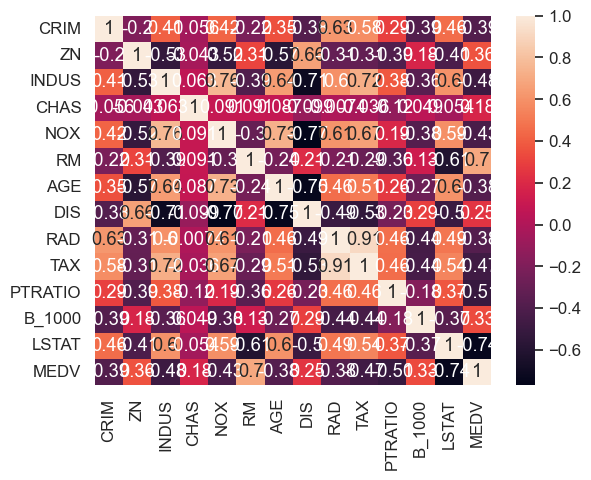

In [73]:
corrX = data.corr()
sns.heatmap(corrX, annot=True)

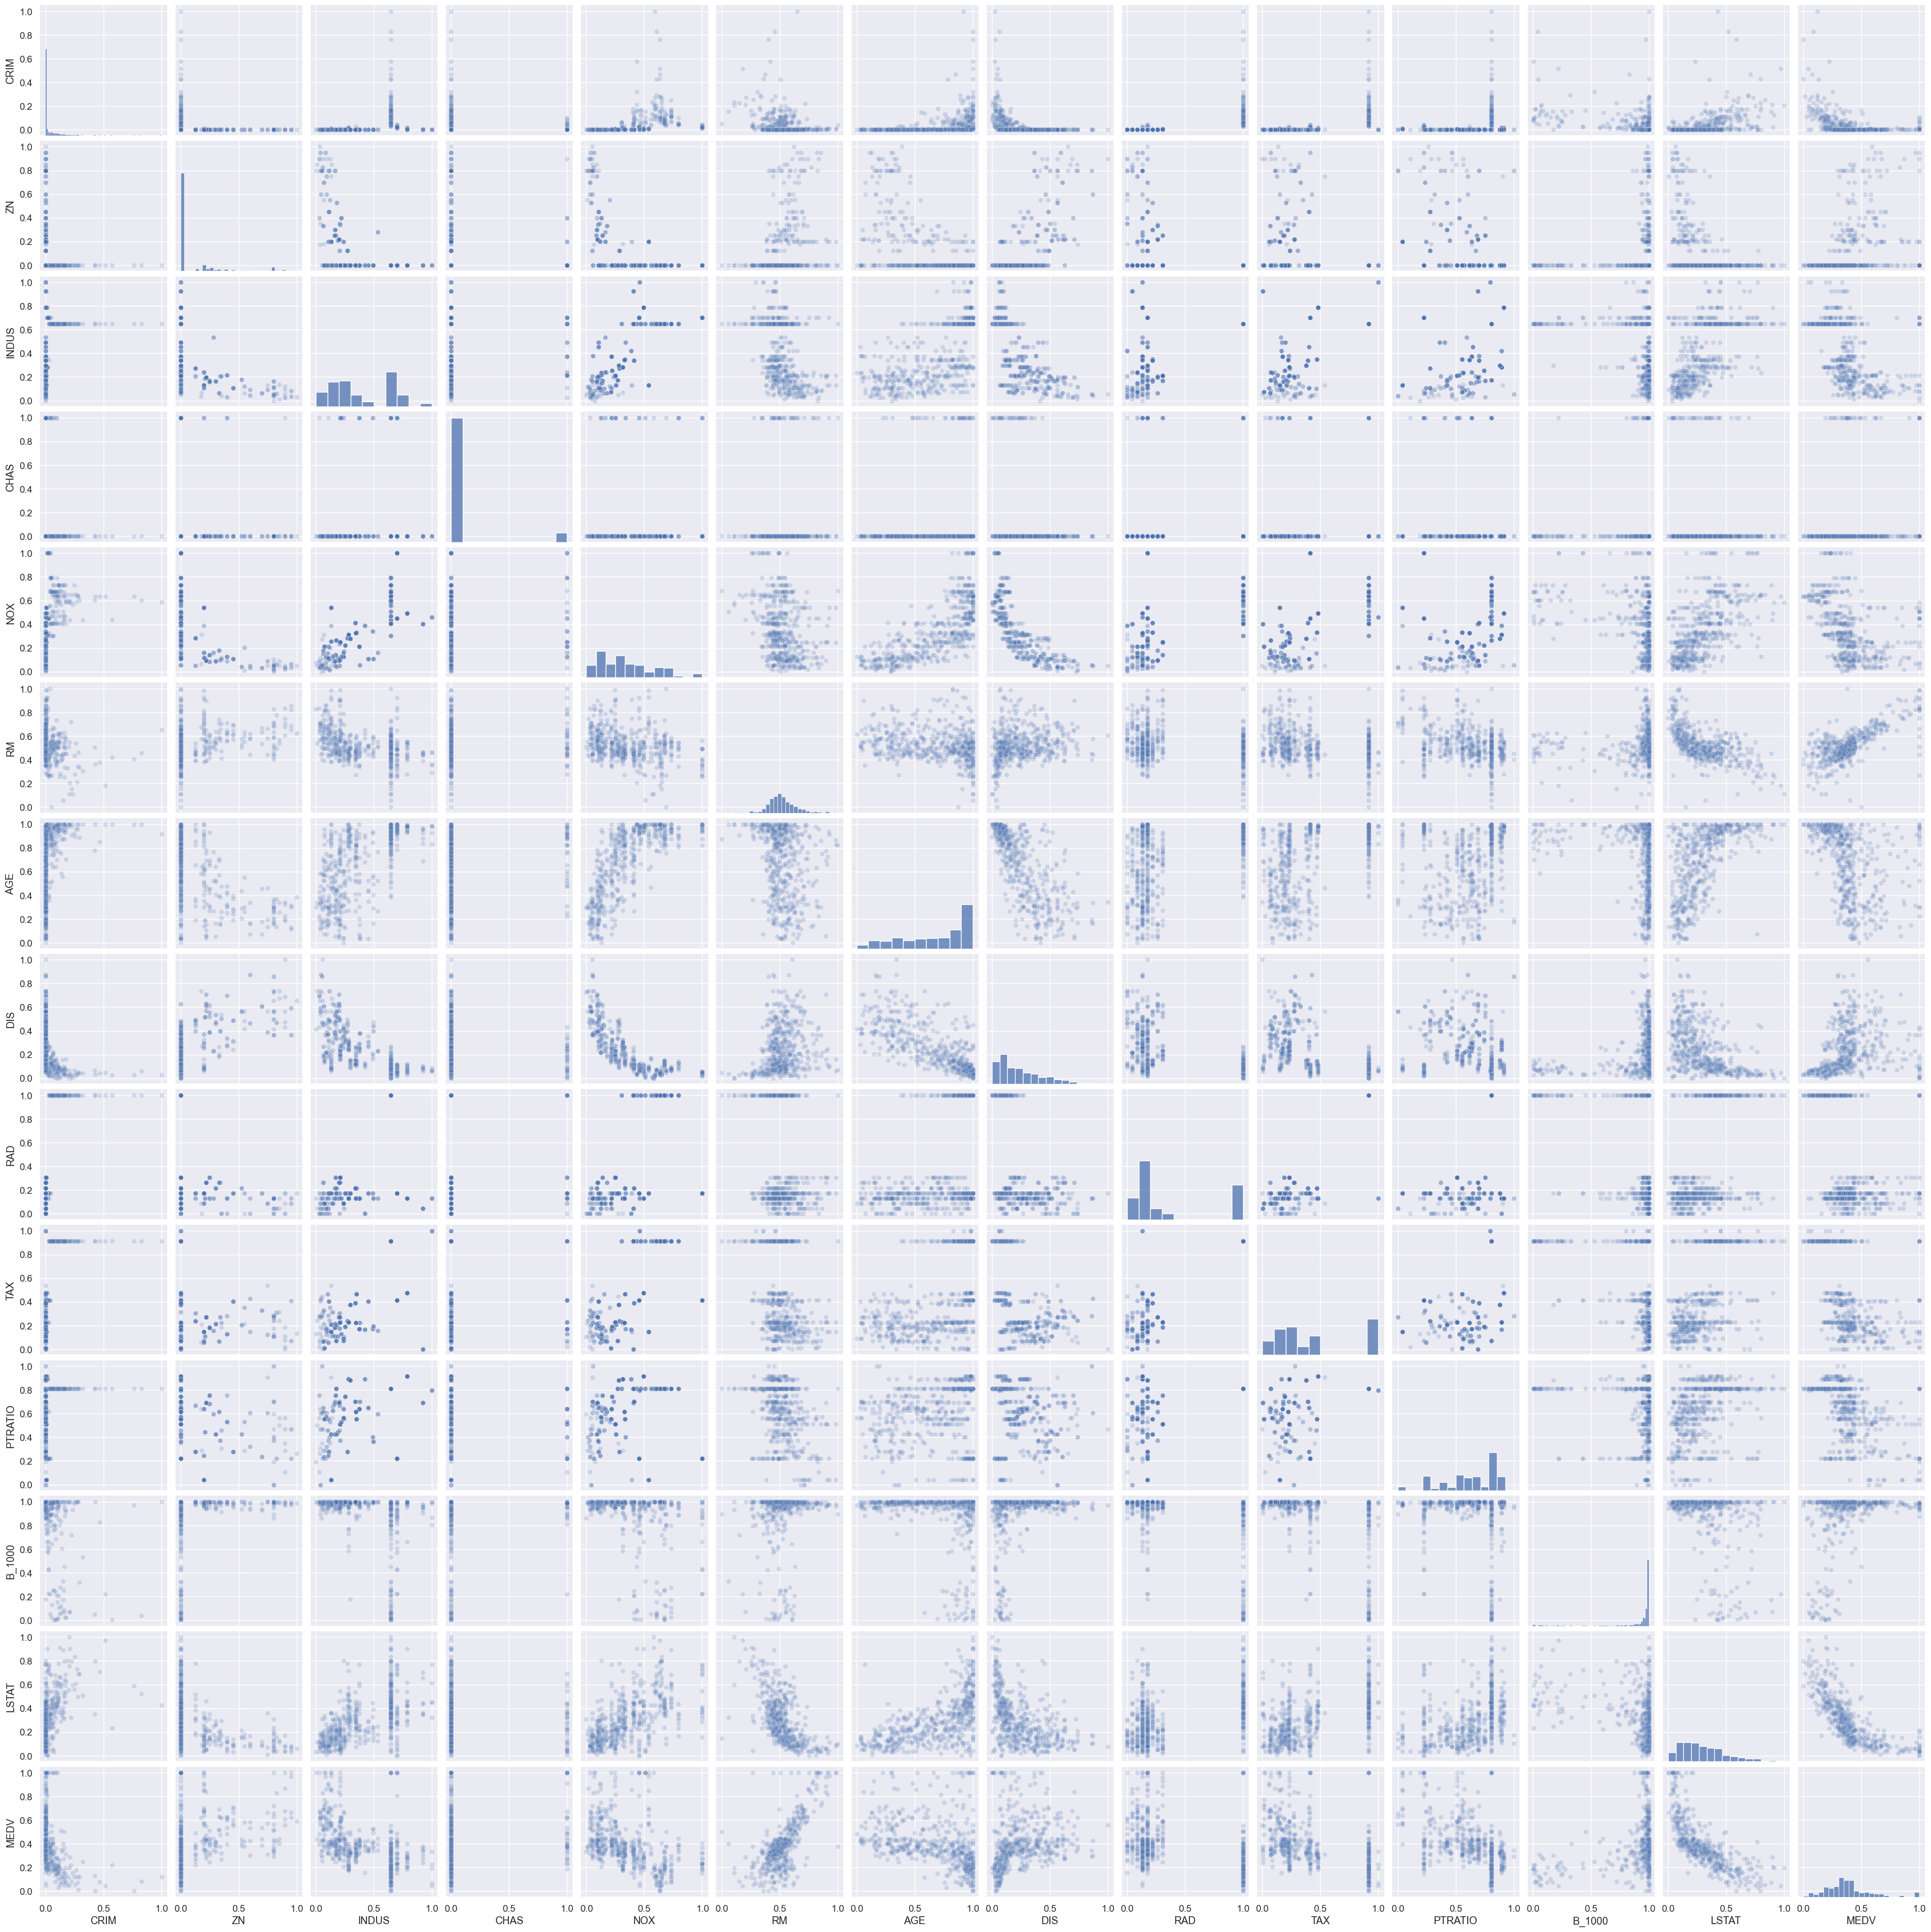

In [74]:
sns.pairplot(data, diag_kind='hist', plot_kws={'alpha': 0.2})